In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import matplotlib.animation as animation
import pandas

In [6]:
df = pandas.read_csv('csv/20200223_151716_Accelerometer.csv')

acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2

xyz= df['X (mg)'] + df['Y (mg)'] + df['Z (mg)']

acc = np.sqrt(acc)

In [7]:
FrontKick = pandas.read_csv('csv/Front_Kick.csv')
print(xyz)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 5, saw 8


In [72]:
HostTime = df['HostTimestamp']
HostTime -= HostTime[0]
HostTime /= 1000

acc=np.array(acc)/1000
print(acc)
print(HostTime)

HostTime = np.array(HostTime)

[1.66676033 1.26877658 1.10094914 0.9523282  0.63478815 2.0063868
 1.69244025 1.72713491 1.72142877 0.86590819 0.48656963 0.67494444
 2.4957007  1.37143611 1.16227966 1.1106255  1.11115885 1.21806855
 1.83584831 2.82449252 2.92100359 3.07584444 1.69030559 1.905798
 2.14084049 3.23183121 3.43143075 2.97800839 2.78865792 2.51816699
 2.24357237 2.17247071 2.26557653 2.1226898  2.12112541 2.70661745
 2.48515653 0.97480357 1.68934662 1.10087829 1.1888629  0.74557025
 1.16477723 1.25370571 2.01297988 2.88735935 2.46605515 2.96126949
 2.36714617 0.65630938 1.86332096 2.48242241 2.57699321 3.32619137
 2.94121981 2.2565385  1.89854708 1.11655049 1.99320646 1.53166086
 2.51213893 2.50409545 1.42514841 3.00984485 1.12685314 2.14946645
 1.21773601 1.07141169 1.64684334 2.24998511 2.19192974 2.84675693
 0.40993292 2.42949501 2.84375491 2.0112337  2.14072955 3.00171767
 2.91869303 1.32720533 1.75411402 3.37516281 1.97868719 3.32943374
 1.71173216 1.77868435 2.12243186 2.53957083 2.3455008  2.2411836

In [54]:
duration = int(HostTime[-1])
samples = int(len(HostTime)/duration)
print(duration)

36


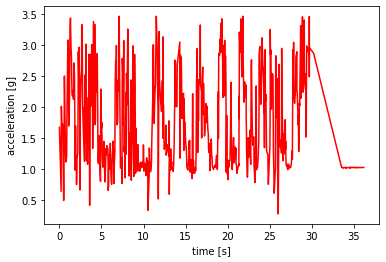

In [55]:
plt.plot(HostTime,acc,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration [g]')
plt.show()

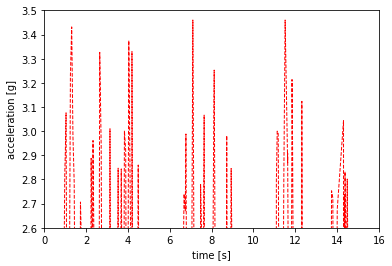

In [43]:


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 16), ylim=(2.6, 3.5))
plt.xlabel('time [s]')
plt.ylabel('acceleration [g]')
line, = ax.plot([], [], 'bo', lw=2)
line1, = ax.plot([], [], 'r--', lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data(HostTime,acc)
    return line, line1

# animation function.  This is called sequentially
def animate(i):
    x = HostTime[i]
    y = acc[i]
    #ax.set_xlim([x[0],x[-1]])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
length = HostTime[-1]
points = len(HostTime)
inter = int(length/points*1000)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=points, interval=50, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('acceleration.mp4', fps=int(points/length), extra_args=['-vcodec', 'libx264'])

plt.show()

In [44]:
inter

55